In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
df

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,132.918411,75752
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,39.483672,75753
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,48.404398,75754
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,592.022750,75755


In [4]:
def facility_type(x):
    if x.find('Warehouse') >= 0:
        type = 'Warehouse'
    elif x.find('Data') >= 0:
        type = 'Data'
    elif x.find('ducation') >= 0:
        type = 'Education'
    elif x.find('Commercial') >= 0:
        type = 'Commercial'
    elif x.find('Residential') >= 0:
        type = 'Residential'
    elif x.find('Industrial') >= 0:
        type = 'Industrial'
    elif x.find('ealth') >= 0:
        type = 'Health'  
    elif x.find('Retail') >= 0:
        type = 'Retail'
    elif x.find('Retail') >= 0:
        type = 'Retail'
    elif x.find('Office') >= 0:
        type = 'Office'
    elif x.find('Lodging') >= 0:
        type = 'Lodging'
    elif x.find('arket') >= 0:
        type = 'Market'
    elif x.find('Public') >= 0:
        type = 'Public'
    elif x.find('ervice')>= 0:
        type = 'Service'
    elif x.find('Food')>= 0:
        type = 'Service'      
    elif x.find('Religious') >= 0:
        type = 'Religious'        
    elif x.find('Parking') >= 0:
        type = 'Parking'          
    elif x.find('uilding') >= 0:
        type = 'Building'      
    elif x.find('ultifamily') >= 0:
        type = 'Multifamily'   
    elif x.find('Laboratory') >= 0:
        type = 'Laboratory'           
    elif x.find('Nursing_Home') >= 0:
        type = 'Nursing_Home'         
    else:
        type = 'Other'
    return type

In [5]:
df['facility_type_s'] = df['facility_type'].apply(facility_type)
test_data['facility_type_s'] = test_data['facility_type'].apply(facility_type)

## Data cleaning

In [6]:
# clean up data type
categorical_cols = [
    c
    for c in df.columns
    if (1 < df[c].nunique()) & (df[c].dtype != np.number) & (df[c].dtype != int)
]
categorical_cols
for col in categorical_cols:
    df[col] = df[col].astype("category")

/var/folders/jw/71kz1mm55lj8zynw1gmlz4_m0000gn/T/ipykernel_3026/2798579264.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if (1 < df[c].nunique()) & (df[c].dtype != np.number) & (df[c].dtype != int)


In [7]:
# handle missing values
from sklearn.impute import SimpleImputer

null_col = [
    "energy_star_rating",
    "direction_max_wind_speed",
    "direction_peak_wind_speed",
    "max_wind_speed",
    "days_with_fog",
]

imputer = SimpleImputer()
imputer.fit(df[null_col])
data_transformed = imputer.transform(df[null_col])
df[null_col] = pd.DataFrame(data_transformed)

## for test data
test_data_transformed = imputer.transform(test_data[null_col])
test_data[null_col] = pd.DataFrame(test_data_transformed)

In [8]:
df["year_built"] = df["year_built"].replace(np.nan, 2022)
test_data["year_built"] = test_data["year_built"].replace(np.nan, 2022)

In [9]:
df['year_built'] = df['year_built'].apply(lambda x: 2022 if x<1600 else x)

In [10]:
df["State_Factor_encoded"] = df.groupby("State_Factor")["site_eui"].transform("mean")
df["building_class_encoded"] = df.groupby("building_class")["site_eui"].transform("mean")
df["facility_type_encoded"] = df.groupby("facility_type")["site_eui"].transform("mean")

In [11]:
di = df[["State_Factor","State_Factor_encoded"]].drop_duplicates().set_index('State_Factor').to_dict()['State_Factor_encoded']
df = df.replace({"State_Factor":di})
test_data = test_data.replace({"State_Factor":di})

di = df[["building_class","building_class_encoded"]].drop_duplicates().set_index('building_class').to_dict()['building_class_encoded']
df = df.replace({"building_class":di})
test_data = test_data.replace({"building_class":di})

di = df[["facility_type","facility_type_encoded"]].drop_duplicates().set_index('facility_type').to_dict()['facility_type_encoded']
df = df.replace({"facility_type":di})
test_data = test_data.replace({"facility_type":di})

df = df.drop(['State_Factor_encoded', 'building_class_encoded', 'facility_type_encoded'], axis=1)

In [12]:
df['ELEVATION'] = df['ELEVATION'].apply(lambda x: 1 if x<0 else x)
df['ELEVATION_log'] = round(np.log(df['ELEVATION']), 2)
df['year_built_2'] = 2022 - df['year_built']
df['floor_area_log'] = round(np.log(df['floor_area']), 2)

test_data['ELEVATION'] = test_data['ELEVATION'].apply(lambda x: 1 if x<0 else x)
test_data['ELEVATION_log'] = round(np.log(test_data['ELEVATION']), 2)
test_data['year_built_2'] = 2022 - test_data['year_built']
test_data['floor_area_log'] = round(np.log(test_data['floor_area']), 2)

In [13]:
df['facility_type_s'] = df['facility_type_s'].astype('str')
test_data['facility_type_s'] = test_data['facility_type_s'].astype('str')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  float64
 2   building_class             75757 non-null  float64
 3   facility_type              75757 non-null  float64
 4   floor_area                 75757 non-null  float64
 5   year_built                 75757 non-null  float64
 6   energy_star_rating         75757 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

## EDA

In [385]:
df[df['id'] == 2]

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,facility_type_s
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,0,0,0,1.0,62.779974,1.0,12.0,24.693619,2,Market


/Users/vivianho/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='site_eui', ylabel='Density'>

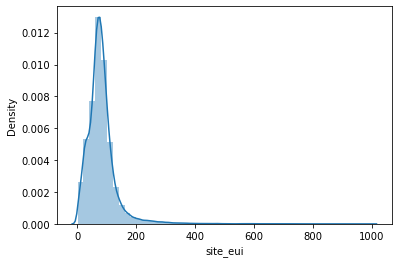

In [386]:
sns.distplot(df["site_eui"])

/Users/vivianho/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='floor_area_log', ylabel='Density'>

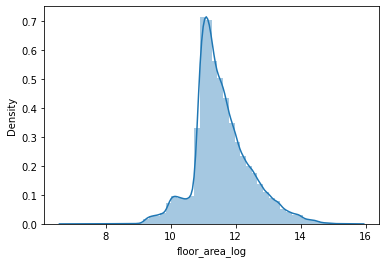

In [387]:
sns.distplot(df['floor_area_log'])

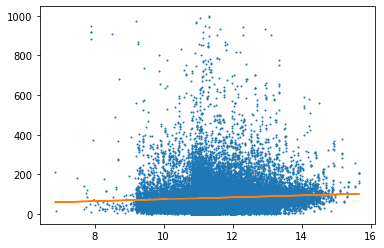

In [388]:
x = df['floor_area_log']
y = df["site_eui"]
plt.plot(x,y, 'o', markersize=1)
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

In [389]:
np.log(2022 - df['year_built'])

/Users/vivianho/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0        4.382027
1        4.204693
2        4.262680
3        3.737670
4        3.610918
           ...   
75752    3.295837
75753    4.718499
75754    4.653960
75755    2.302585
75756    3.871201
Name: year_built, Length: 75751, dtype: float64

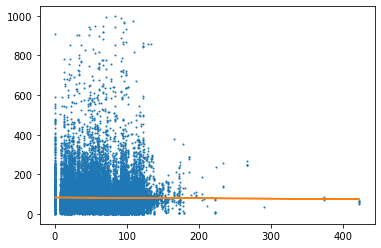

In [390]:

x = df['year_built']
y = df["site_eui"]
plt.plot(x,y, 'o', markersize=1)
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

<AxesSubplot:xlabel='Year_Factor', ylabel='site_eui'>

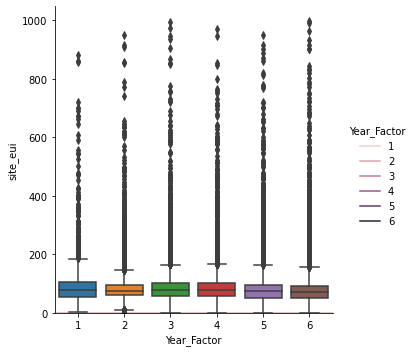

In [391]:
sns.displot(data=df, x="site_eui", hue="Year_Factor", kind="kde")
sns.boxplot(x='Year_Factor', y='site_eui', data=df)

<AxesSubplot:xlabel='State_Factor', ylabel='site_eui'>

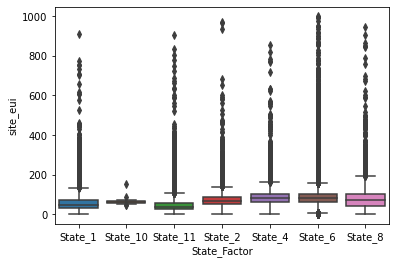

In [392]:
sns.boxplot(x='State_Factor', y='site_eui', data=df)

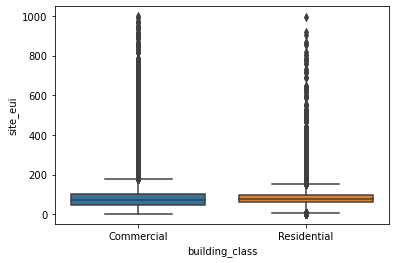

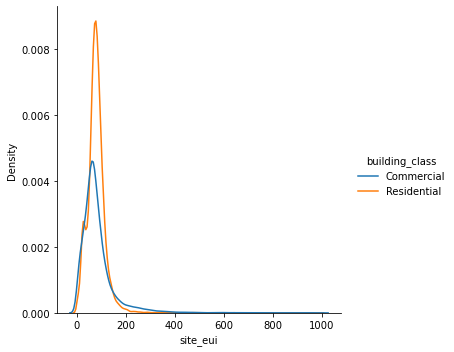

In [393]:
sns.boxplot(x='building_class', y='site_eui', data=df)
sns.displot(data=df, x="site_eui", hue="building_class", kind="kde")

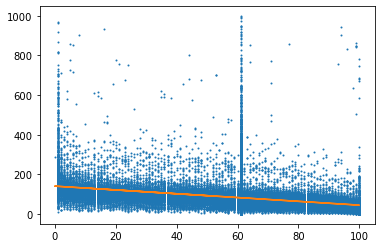

In [394]:
x = df['energy_star_rating']
y = df["site_eui"]
plt.plot(x,y, 'o', markersize=1)
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

/Users/vivianho/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/vivianho/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


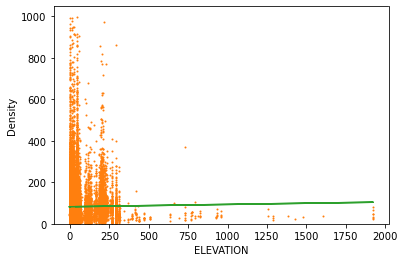

In [671]:
x = df['ELEVATION']
y = df["site_eui"]
plt.plot(x,y, 'o', markersize=1)
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

In [396]:
df.groupby('facility_type').agg({'site_eui':['count','min','mean','max']}).sort_values(('site_eui','mean')).head(10)

site_eui                        \
                                             count        min       mean   
facility_type                                                              
Warehouse_Selfstorage                          577   1.175836  21.589284   
Food_Service_Other                              17  16.200000  29.236616   
2to4_Unit_Building                            1893   5.078905  31.876915   
Warehouse_Uncategorized                        330   2.712158  35.936435   
5plus_Unit_Building                           1273  10.314208  36.737785   
Warehouse_Nonrefrigerated                     1255   1.001169  38.209399   
Warehouse_Distribution_or_Shipping_center      604   1.310190  39.559542   
Service_Drycleaning_or_Laundry                   9  32.209041  42.112542   
Religious_worship                              399   2.252498  44.560675   
Education_Uncategorized                        709   3.637533  46.172799   

                                                       
                                                  max  
facility_type                                          
Warehouse_Selfstorage                      114.301406  
Food_Service_Other                          51.548219  
2to4_Unit_Building                         149.488903  
Warehouse_Uncategorized                    199.781186  
5plus_Unit_Building                        159.722183  
Warehouse_Nonrefrigerated                  695.993169  
Warehouse_Distribution_or_Shipping_center  233.515493  
Service_Drycleaning_or_Laundry              54.538901  
Religious_worship                          178.147259  
Education_Uncategorized                    910.563198

<AxesSubplot:xlabel='facility_type', ylabel='site_eui'>

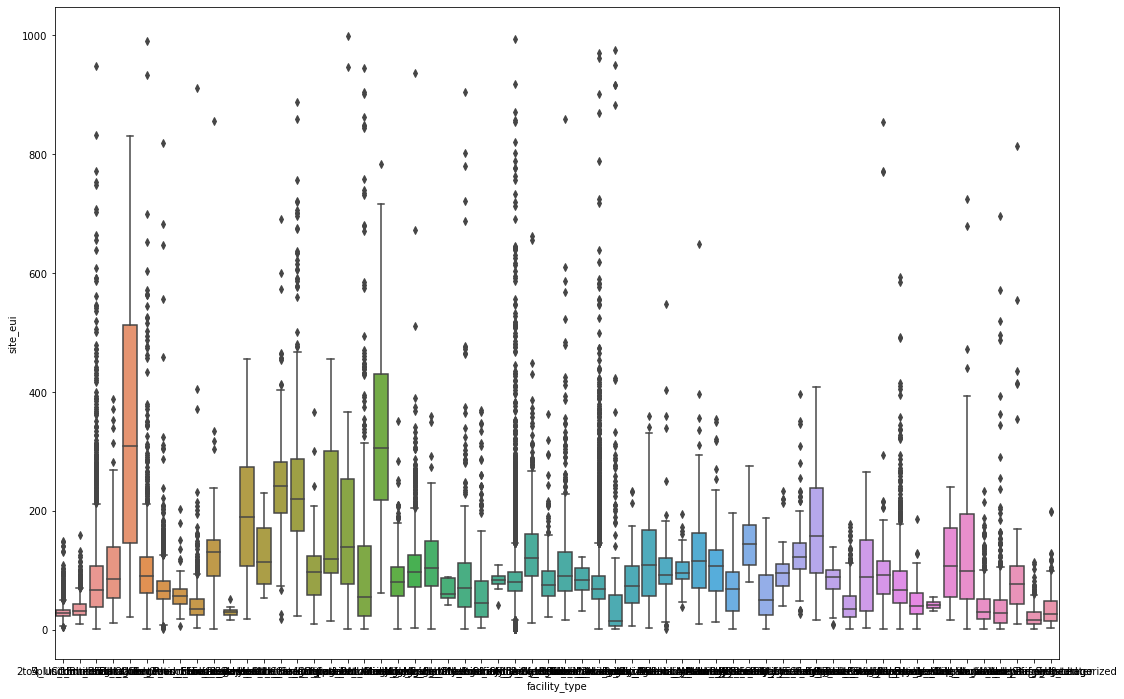

In [414]:
plt.figure(figsize=(18,12))
sns.boxplot(x='facility_type', y='site_eui', data=df)

<AxesSubplot:xlabel='facility_type_s', ylabel='site_eui'>

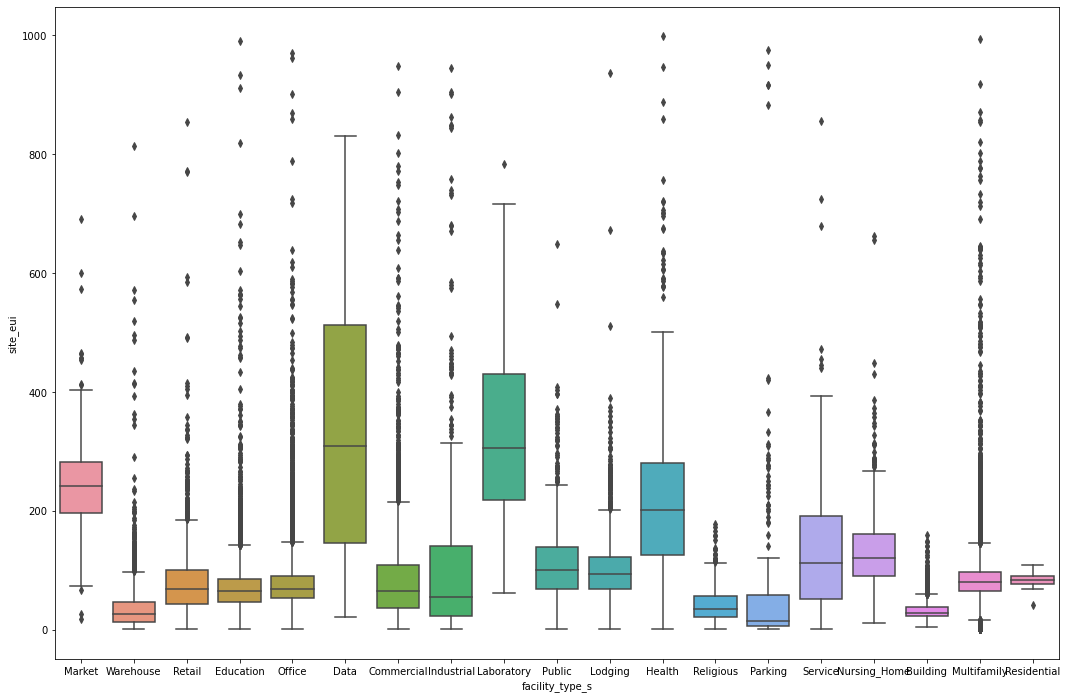

In [415]:
plt.figure(figsize=(18,12))
sns.boxplot(x='facility_type_s', y='site_eui', data=df)

## Feature one-hot encoding and scaling

In [15]:
# Memory optimization

# Original code from https://www.kaggle.com/gemartin/load-data-reduce-memory-usage by @gemartin
# Modified to support timestamp type, categorical type
# Modified to add option to use float16
from pandas.api.types import is_categorical_dtype
from pandas.api.types import is_datetime64_any_dtype as is_datetime
def reduce_mem_usage(data, use_float16=False) -> pd.DataFrame:
    start_mem = data.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in data.columns:
        if is_datetime(data[col]) or is_categorical_dtype(data[col]):
            continue
        col_type = data[col].dtype

        if col_type != object:
            c_min = data[col].min()
            c_max = data[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    data[col] = data[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    data[col] = data[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    data[col] = data[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    data[col] = data[col].astype(np.int64)
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    data[col] = data[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    data[col] = data[col].astype(np.float32)
                else:
                    data[col] = data[col].astype(np.float64)
        else:
            data[col] = data[col].astype('category')

    end_mem = data.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.2f}%'.format(
        100 * (start_mem - end_mem) / start_mem))

    return data

df = reduce_mem_usage(df, use_float16=True)
test_data = reduce_mem_usage(test_data, use_float16=True)

Memory usage of dataframe is 39.30 MB
Memory usage after optimization is: 7.88 MB
Decreased by 79.96%
Memory usage of dataframe is 4.96 MB
Memory usage after optimization is: 0.96 MB
Decreased by 80.58%


In [1047]:
#lightGBM
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['facility_type_s'] = labelencoder.fit_transform(df['facility_type_s'])
test_data['facility_type_s'] = labelencoder.transform(test_data['facility_type_s'])

In [16]:
#XGBoost
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['facility_type_s']

ohe = OneHotEncoder(handle_unknown='ignore')
X_onehot = ohe.fit_transform(df[categorical_cols]).toarray()
X_onehot = pd.DataFrame(X_onehot, columns=ohe.get_feature_names_out())
df = pd.concat([df.drop(categorical_cols, axis=1),X_onehot], axis=1)

test_data_onehot = ohe.transform(test_data[categorical_cols]).toarray()
test_data_onehot = pd.DataFrame(test_data_onehot, columns=ohe.get_feature_names_out())
test_X = pd.concat([test_data.drop(categorical_cols, axis=1), test_data_onehot], axis=1)

In [17]:
X = df.drop(['site_eui','id'], axis=1)
y = df['site_eui']

test_X = test_data.drop('id', axis=1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [816]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#test_scaled = scaler.transform(test_X)

# Model building

In [20]:
import math

def rmse(y_test, y_pred):
    return math.sqrt(mean_squared_error(y_test, y_pred))

## Decision Tree

In [861]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0, criterion="squared_error",max_depth=5,min_samples_split=5,min_samples_leaf=3)
dt.fit(X_train, y_train)

print(rmse(y_train, dt.predict(X_train)))
print(rmse(y_test, dt.predict(X_test)))

47.055182727304334
42.91845765296797


## Linear Regression

In [826]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)
print(rmse(y_train, lr.predict(X_train)))
print(rmse(y_test, lr.predict(X_test)))

47.61458689203792
42.7313911482033


## XGBoost

In [ ]:
from sklearn import ensemble
from xgboost import XGBRegressor
from xgboost import plot_importance
params = {'eval_metric': 'rmse', 'learning_rate': 0.5, 'max_depth': 6, 'subsample': 0.8, 
          'n_estimators': 3000, "grow_policy": 'lossguide', 'lambda':1, 'gamma': 0.5, 'verbosity':1}
clf = XGBRegressor(**params)
clf.fit(X_train, y_train)

print(rmse(y_train, clf.predict(X_train)))
print(rmse(y_test, clf.predict(X_test)))
plot_importance(clf._Booster, max_num_features = 20)

### GridSearch

In [ ]:
parameters = {
    "eval_metric": ["rmse"],
    'n_estimators': [300, 500],
    "learning_rate": [0.05, 0.1],
    "max_depth": [5, 10],
}
model = XGBRegressor()
model_grid = GridSearchCV(model, parameters, cv=3, verbose=False)
model_grid.fit(X_train, y_train)

print(model_grid.best_score_)
print(model_grid.best_params_)
print(model_grid.best_estimator_)
print(rmse(y_train, model_grid.predict(X_train)))
print(rmse(y_test, model_grid.predict(X_test)))

## LightGBM

In [1027]:
categorical = ['facility_type_s']
features=[x for x in X_train.columns]

In [1028]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train, feature_name=features, categorical_feature=categorical, free_raw_data=False)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data, free_raw_data=False)

In [1029]:
import lightgbm as lgm
params = {'boosting_type':'gbdt', 'metric' : 'rmse',
    'num_leaves' : 52, 'min_data_in_leaf' : 20,'max_depth': 30,
    'num_iterations': 3000,
    'feature_fraction': 0.7, 
    'lambda_l2':10,
    #valid='lgb_eval', #early_stopping_round = 30,
    'learning_rate':0.05,
    'verbose' : 1,  'n_jobs':-1,
    'categorical_feature':categorical}

num_round = 3
model = lgb.train(params, train_data, num_round, valid_sets=[validation_data], 
                  callbacks=[lgb.early_stopping(stopping_rounds=50)])


model.predict(X_train, num_round)
print(rmse(y_train, model.predict(X_train)))
print(rmse(y_test, model.predict(X_test)))

/Users/vivianho/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/vivianho/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/Users/vivianho/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['facility_type_s']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/vivianho/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key

[LightGBM] [Warning] categorical_feature is set=facility_type_s, categorical_column=62 will be ignored. Current value: categorical_feature=facility_type_s
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4306
[LightGBM] [Info] Number of data points in the train set: 60605, number of used features: 66
[LightGBM] [Info] Start training from score 82.556339
Training until validation scores don't improve for 50 rounds


/Users/vivianho/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/vivianho/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


Early stopping, best iteration is:
[2350]	valid_0's rmse: 39.2015
25.098302514743427
39.20148858320508


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

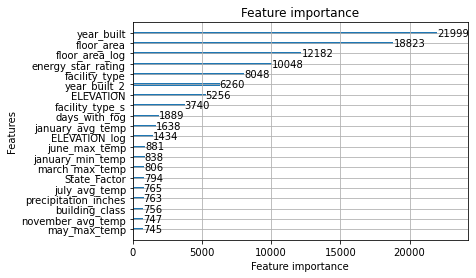

In [1030]:
lgb.plot_importance(model, max_num_features=20)

### GridSearch

In [562]:
from sklearn.model_selection import GridSearchCV
model = lightgbm.LGBMRegressor()

# those are just some example parameters to help you get started!

parameters = {
    "objective": ["root_mean_squared_error"],
    "learning_rate": [0.05, 0.1, 0.15, 0.2],
    "num_leaves": [30, 40],
    "max_depth": [10, 20, 30, 40],
}

model_grid = GridSearchCV(model, parameters, cv=3, verbose=False, scoring='neg_root_mean_squared_error', n_jobs=-1)

model_grid.fit(X_train, y_train)

print(model_grid.best_score_)
print(model_grid.best_params_)
print(model_grid.best_estimator_)
print(rmse(y_train, model_grid.predict(X_train)))
print(rmse(y_test, model_grid.predict(X_test)))

-42.70185494449223
{'learning_rate': 0.2, 'max_depth': 30, 'num_leaves': 40, 'objective': 'root_mean_squared_error'}
LGBMRegressor(learning_rate=0.2, max_depth=30, num_leaves=40,
              objective='root_mean_squared_error')
36.00392084465218
41.78888676512866


## CatBoost

In [1068]:
from catboost import CatBoostRegressor 
cat = CatBoostRegressor(
                    iterations=3000,
                    depth=10,
                    grow_policy='Lossguide',
                    verbose=False,
                    l2_leaf_reg=1, bagging_temperature=0.8,
                    learning_rate=0.08
                )

cat.fit(X_train, y_train)
print(rmse(y_train, cat.predict(X_train)))
print(rmse(y_test, cat.predict(X_test)))

18.988314226226926
38.10809608409698


In [1084]:
pd.DataFrame({'feature_names': X_train.columns, 'feature_importance':cat.get_feature_importance()}).sort_values(by=['feature_importance'], 
                                                           ascending=False).head(20)

,feature_names,feature_importance
3,facility_type,28.498675
6,energy_star_rating,23.851024
4,floor_area,7.756311
5,year_built,5.863492
64,floor_area_log,5.028693
63,year_built_2,4.755519
70,facility_type_s_Industrial,2.052228
66,facility_type_s_Commercial,1.444122
76,facility_type_s_Office,1.441065
7,ELEVATION,1.346817


# Make predictions on test data(hold-out dataset)

In [1013]:
prediction = model.predict(test_X)

In [1014]:
prediction = pd.DataFrame(prediction, columns=['site_eui'])
prediction = pd.concat([test_data['id'], prediction], axis=1)
prediction.to_csv('prediction.csv', index=False)

In [1015]:
prediction

,id,site_eui
0,75757,230.764791
1,75758,207.808123
2,75759,202.562198
3,75760,245.863368
4,75761,277.267158
...,...,...
9700,85457,44.668977
9701,85458,59.231953
9702,85459,52.482382
9703,85460,61.289663
